# Train a Semantic Segmentation Model for Water Detection

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/geoai/blob/main/docs/examples/water_detection.ipynb)

This notebook demonstrates how to train semantic segmentation models for water detection.

## Install packages

To use the new functionality, ensure the required packages are installed.

## Import libraries

In [1]:
!pip install geoai

  Preparing metadata (setup.py) ... done
  Created wheel for geoai: filename=geoai-0.0.0.0-py3-none-any.whl size=1043 sha256=15dd19d098588f0e5392f184894a822fb3132e83a4b310a42776efda63bc99ba
  Stored in directory: /root/.cache/pip/wheels/e6/d4/86/1a3e3fec278f85d65745903b5e8ca68498dbcce54968a99db3
Successfully built geoai


In [2]:
%pip install geoai-py
import geoai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.3/291.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.9/632.9 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.8/241.8 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

## Download sample data

Dataset used: [waterbody dataset](https://www.kaggle.com/datasets/franciscoescobar/satellite-images-of-water-bodies) from Kaggle.

In [3]:
url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/waterbody-dataset.zip"

In [4]:
out_folder = geoai.download_file(url)

Extracted to: waterbody-dataset


## Train semantic segmentation model


In [5]:
# Test train_segmentation_model with automatic size detection
geoai.train_segmentation_model(
    images_dir=f"{out_folder}/images",
    labels_dir=f"{out_folder}/masks",
    output_dir=f"{out_folder}/unet_models",
    architecture="unet",
    encoder_name="resnet34",
    encoder_weights="imagenet",
    num_channels=3,
    num_classes=2,  # background and water
    batch_size=8,
    num_epochs=3,
    learning_rate=0.001,
    val_split=0.2,
    verbose=True,
)

Using device: cuda
Found 2841 image files and 2841 label files
Training on 2272 images, validating on 569 images
Checking image sizes for compatibility...
Setting target_size to (512, 512) to standardize image dimensions.
This will resize all images to 512x512 pixels.
To use a different size, set target_size parameter explicitly.
Testing data loader...
Data loader test passed.


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

Starting training with unet + resnet34
Model parameters: 24,436,514
Epoch: 1, Batch: 1/284, Loss: 0.7145, Time: 6.04s
Epoch: 1, Batch: 11/284, Loss: 0.4557, Time: 5.75s
Epoch: 1, Batch: 21/284, Loss: 0.6258, Time: 5.77s
Epoch: 1, Batch: 31/284, Loss: 0.4174, Time: 5.79s
Epoch: 1, Batch: 41/284, Loss: 0.4804, Time: 5.81s
Epoch: 1, Batch: 51/284, Loss: 0.7058, Time: 5.85s
Epoch: 1, Batch: 61/284, Loss: 0.5426, Time: 5.87s
Epoch: 1, Batch: 71/284, Loss: 0.4147, Time: 5.89s
Epoch: 1, Batch: 81/284, Loss: 0.4112, Time: 5.93s
Epoch: 1, Batch: 91/284, Loss: 0.5092, Time: 5.97s
Epoch: 1, Batch: 101/284, Loss: 0.4195, Time: 5.99s
Epoch: 1, Batch: 111/284, Loss: 0.4914, Time: 6.04s
Epoch: 1, Batch: 121/284, Loss: 0.4825, Time: 6.07s
Epoch: 1, Batch: 131/284, Loss: 0.5639, Time: 6.12s
Epoch: 1, Batch: 141/284, Loss: 0.4189, Time: 6.12s
Epoch: 1, Batch: 151/284, Loss: 0.4681, Time: 6.17s
Epoch: 1, Batch: 161/284, Loss: 0.4603, Time: 6.20s
Epoch: 1, Batch: 171/284, Loss: 0.4763, Time: 6.26s
Epoch: 

## Evaluate the model



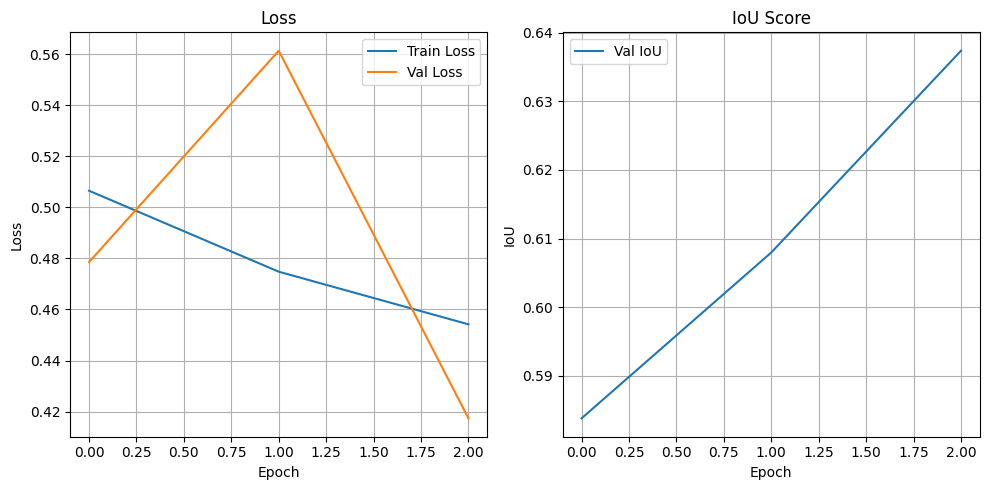

Best IoU: 0.6374
Final IoU: 0.6374


In [6]:
geoai.plot_performance_metrics(
    history_path=f"{out_folder}/unet_models/training_history.pth",
    figsize=(15, 5),
    verbose=True,
)

## Run inference

You can run inference on a new image using the `semantic_segmentation` function. I don't have a new image to test on, so I'll use one of the training images. In reality, you would use your own images not used in training.

In [45]:
index = 11
test_image_path = f"{out_folder}/images/water_body_{index}.jpg"
ground_truth_path = f"{out_folder}/masks/water_body_{index}.jpg"
prediction_path = f"{out_folder}/prediction/water_body_{index}.png"  # save as png to preserve exact values and avoid compression artifacts
model_path = f"{out_folder}/unet_models/best_model.pth"

In [46]:
# Run semantic segmentation inference
geoai.semantic_segmentation(
    input_path=test_image_path,
    output_path=prediction_path,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=4,
)

Input file format: Regular image (.jpg)
Processing image: 1299x1303
Processing 25 windows...


36it [00:00, 41.54it/s]


Raw predicted classes and counts: {0: 1307406, 1: 385191}
Binary predicted classes and counts: {0: 1307406, 255: 385191}
Inference completed in 1.06 seconds
Saved binary prediction to waterbody-dataset/prediction/water_body_11.png (PNG format to preserve exact values)


## Visualize the results

Plot saved to: waterbody-dataset/prediction/water_body_11_comparison.png


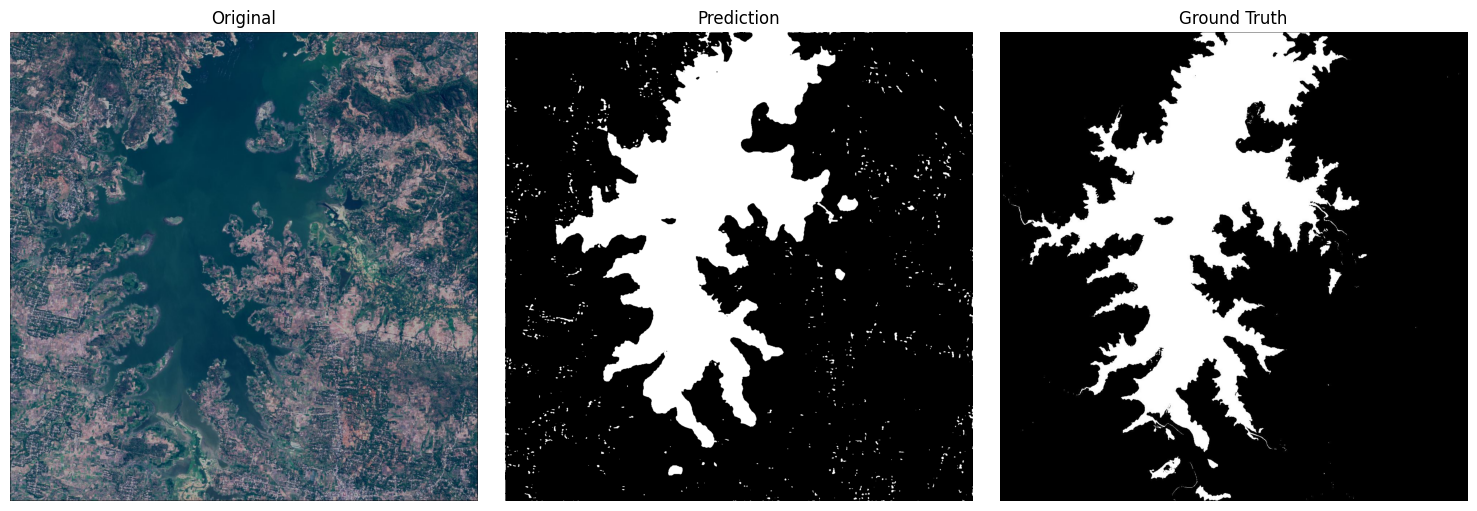

In [47]:
fig = geoai.plot_prediction_comparison(
    original_image=test_image_path,
    prediction_image=prediction_path,
    ground_truth_image=ground_truth_path,
    titles=["Original", "Prediction", "Ground Truth"],
    figsize=(15, 5),
    save_path=f"{out_folder}/prediction/water_body_{index}_comparison.png",
    show_plot=True,
)

In [35]:

test_image_path = "/content/new samples/powai.png"
ground_truth_path = "/content/new samples/powai.png"
prediction_path = "/content/new samples/powai_prediction.png" # save as png to preserve exact values and avoid compression artifacts
model_path = f"{out_folder}/unet_models/best_model.pth"

In [36]:
# Run semantic segmentation inference for powai.png
geoai.semantic_segmentation(
    input_path=test_image_path,
    output_path=prediction_path,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=4,
)

Input file format: Regular image (.png)
Processing image: 864x788
Processing 9 windows...


16it [00:00, 37.39it/s]


Raw predicted classes and counts: {0: 650352, 1: 30480}
Binary predicted classes and counts: {0: 650352, 255: 30480}
Inference completed in 0.51 seconds
Saved binary prediction to /content/new samples/powai_prediction.png (PNG format to preserve exact values)


Plot saved to: waterbody-dataset/prediction/powai_comparison.png


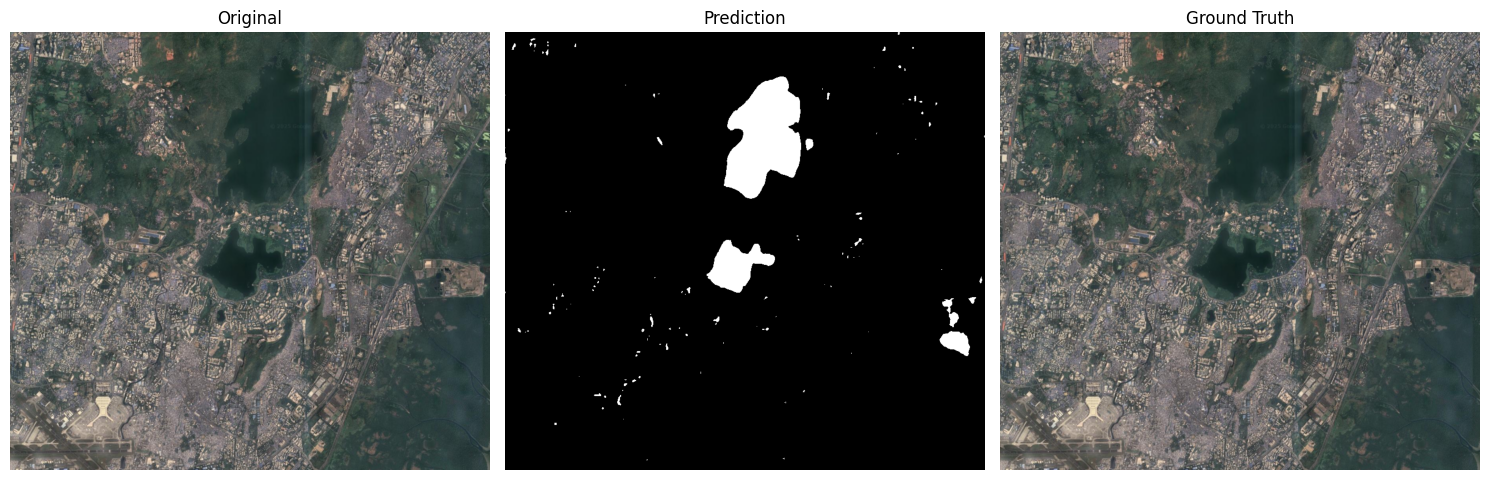

In [38]:
fig = geoai.plot_prediction_comparison(
    original_image=test_image_path,
    prediction_image=prediction_path,
    ground_truth_image=ground_truth_path,
    titles=["Original", "Prediction", "Ground Truth"],
    figsize=(15, 5),
    save_path=f"{out_folder}/prediction/powai_comparison.png", # save path for powai.png
    show_plot=True,
)

In [31]:
test_image_path = "/content/new samples/lake1.png"
ground_truth_path = "/content/new samples/lake1.png"
prediction_path = "/content/new samples/lake1_prediction.png" # save as png to preserve exact values and avoid compression artifacts
model_path = f"{out_folder}/unet_models/best_model.pth"

In [32]:
# Run semantic segmentation inference for powai.png
geoai.semantic_segmentation(
    input_path=test_image_path,
    output_path=prediction_path,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=4,
)

Input file format: Regular image (.png)
Processing image: 863x760
Processing 6 windows...


12it [00:00, 33.93it/s]

Raw predicted classes and counts: {0: 588088, 1: 67792}
Binary predicted classes and counts: {0: 588088, 255: 67792}
Inference completed in 0.43 seconds
Saved binary prediction to /content/new samples/lake1_prediction.png (PNG format to preserve exact values)


Plot saved to: waterbody-dataset/prediction/lake_comparison.png


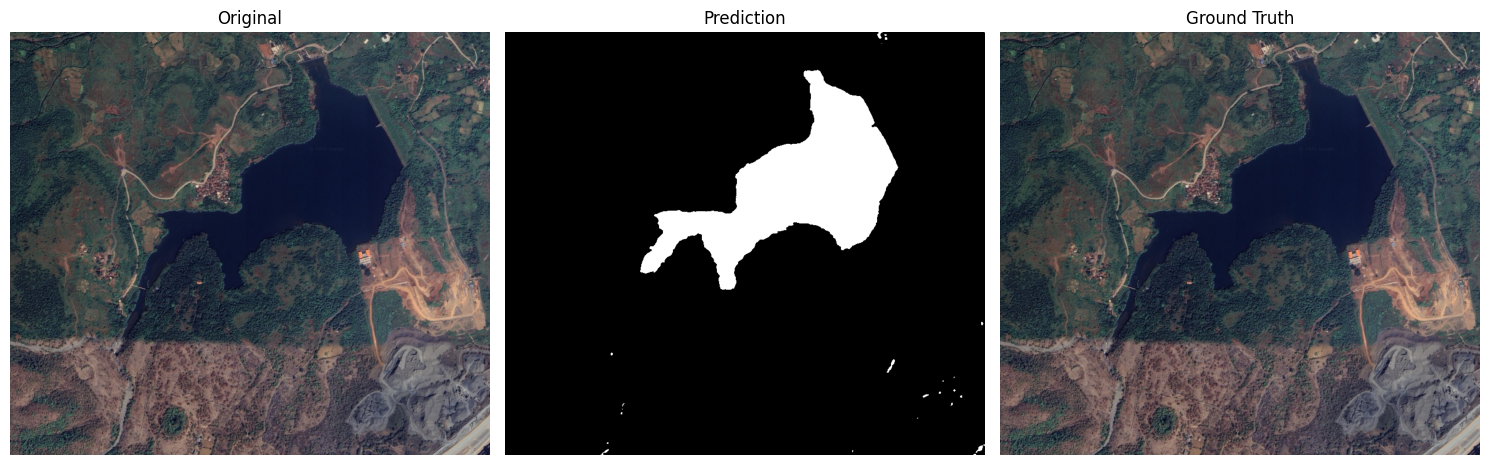

In [34]:
fig = geoai.plot_prediction_comparison(
    original_image=test_image_path,
    prediction_image=prediction_path,
    ground_truth_image=ground_truth_path,
    titles=["Original", "Prediction", "Ground Truth"],
    figsize=(15, 5),
    save_path=f"{out_folder}/prediction/lake_comparison.png",
    show_plot=True,
)